<a href="https://colab.research.google.com/github/MyoungsulKim/MyFirstApp_msKim/blob/master/ProDS_%EC%8B%A4%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1)
- 다음과 같은 산불 발생 데이터로 각 문제를 해결하세요.
    - ID : 산불 발생 id
    - MONTH : 산불 발생 월
    - PREC : 당시 강수량(단위 : mm)
    - AREA : 피해 면적(단위 : ha)

In [ ]:
# (코드 실행) 데이터 생성
import pandas as pd
df = pd.DataFrame({
    'ID' : [1, 2, 3, 4, 5, 6, 7, 8],
    'MONTH' : [8, 3, 1, 1, 8, 8, 12, 10],
    'PREC' : [5, 0, 3, 0, 2, 0, 0, 3],
    'AREA' : [0, 0, 3, 40, 0, 15, 30, 20]
})
df

,ID,MONTH,PREC,AREA
0,1,8,5,0
1,2,3,0,0
2,3,1,3,3
3,4,1,0,40
4,5,8,2,0
5,6,8,0,15
6,7,12,0,30
7,8,10,3,20


<br/>
<br/>

#### Q1-1) 8월의 산불 발생 빈도수를 구하세요.

In [ ]:
print(df['MONTH'].value_counts()[8]) # df.groupby('MONTH')['MONTH'].count()[8]

3


<br/>
<br/>

#### Q1-2) 피해 면적의 평균이 13이라 가정하여 t 검정을 수행하고 t 통계량을 구하세요.
- 참고 코드
```python
from scipy import stats
stats.ttest_1samp(...)
```

In [ ]:
from scipy import stats
t_stat, p_value = stats.ttest_1samp(df['AREA'], 13)
print(t_stat)

0.09139596247669025


<br/>
<br/>

#### Q1-3) 결정 트리 알고리즘을 활용하여 데이터를 학습하고 정확도를 구하세요.
- (step1) 면적(AREA) 값이 5보다 크면 1, 그렇지 않으면 0으로 변환하여 "CRITICAL" 열에 추가
- (step2) X, y 분리
    - X : MONTH, PREC 열
    - y : CRITICAL 열
- (step3) DecisionTreeClassifier 알고리즘으로 X, y를 학습하고 정확도 출력
    - 트리의 최대 깊이 : 1
    - random_state : 1234
    - 정확도(Accuracy) : (정답 개수) / (전체 데이터 개수) * 100
- 참고 코드
```python
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(...)
```

In [ ]:
df['CRITICAL'] = df['AREA'].apply(lambda x : 1 if x > 5 else 0)
X = df[['MONTH', 'PREC']]
y = df['CRITICAL']

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 1, random_state=1234)
clf.fit(X, y)
print(clf.score(X, y) * 100)

75.0


<br/>
<br/>
<br/>
<br/>

---

# Q2)
- 다음과 같은 학업 성취도 데이터로 각 문제를 해결하세요.
    - SID : 학생 id
    - ETHNIC : 민족
    - LUNCH : 점심 지원 여부
    - SCORE_MATH : 수학 점수
    - SCORE_LANG : 언어 점수

In [ ]:
# (코드 실행) 데이터 생성
import pandas as pd
import numpy as np
np.random.seed(42)
df = pd.DataFrame({
    'SID' : range(1, 21),
    'ETHNIC' : np.random.choice(['group1', 'group2', 'group3'], 20),
    'LUNCH' : np.random.choice([0, 1], 20),
    'SCORE_MATH' : np.random.choice(range(0, 101, 5), 20),
    'SCORE_LANG' : np.random.choice(range(0, 101, 5), 20)
})
df

,SID,ETHNIC,LUNCH,SCORE_MATH,SCORE_LANG
0,1,group3,1,70,30
1,2,group1,1,90,55
2,3,group3,0,55,35
3,4,group3,0,95,70
4,5,group1,1,10,10
5,6,group1,1,20,65
6,7,group3,1,90,80
7,8,group2,0,30,15
8,9,group3,1,100,85
9,10,group3,0,40,35


<br/>
<br/>

#### Q2-1) 수학 점수와 언어 점수의 상관계수를 구하세요.

In [ ]:
print(df[['SCORE_MATH', 'SCORE_LANG']].corr().iloc[1,0])

0.4287186928961863


<br/>
<br/>

#### Q2-2) 민족과 점심 지원 여부의 독립성 검정을 수행하고 p-value를 구하세요.
- 참고 코드
```python
pd.crosstab(열1, 열2) # 두 범주형 변수의 빈도 교차표 생성
```
```python
from scipy import stats
stats.chi2_contingency(..., correction=False)
```

In [ ]:
table = pd.crosstab(df['ETHNIC'], df['LUNCH'])
display(table)

from scipy import stats
chi2_stat, p_value, _, _ = stats.chi2_contingency(table, correction=False)
print(p_value)

LUNCH,0,1
ETHNIC,,
group1,1,4
group2,2,4
group3,6,3


0.19208224297687274


<br/>
<br/>

#### Q2-3) 선형 회귀 알고리즘을 활용하여 데이터를 학습하고 RMSE를 구하세요.
- (step1) 학생 ID(SID) 값이 15 이하면 학습 데이터, 15 초과면 검증 데이터로 분리
- (step2) X, y 분리
    - X_train, X_test : LUNCH, SCORE_LANG 열
    - y_train, y_test : SCORE_MATH 열
- (step3) LinearRegression 알고리즘으로 X_train, y_train을 학습하고 RMSE 출력
- 참고 코드
```python
from sklearn.linear_model import LinearRegression
LinearRegression(...)
```
```python
np.sqrt(((...)**2).mean()) # RMSE
```

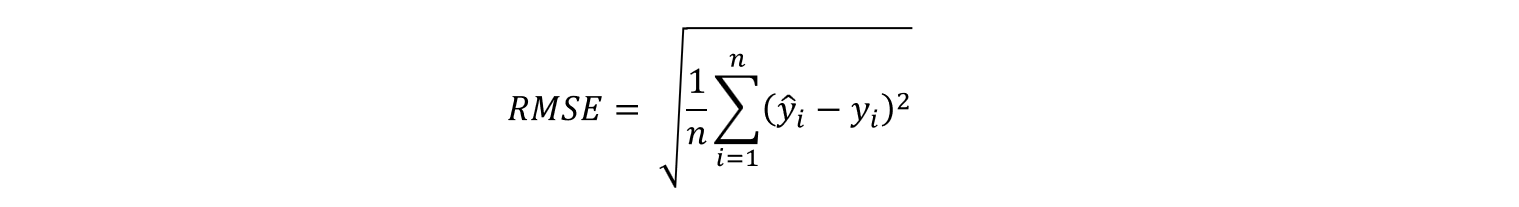

In [ ]:
train = df[df['SID'] <= 15]
test = df[df['SID'] > 15]

X_train = train[['LUNCH', 'SCORE_LANG']]
y_train = train['SCORE_MATH']
X_test = test[['LUNCH', 'SCORE_LANG']]
y_test = test['SCORE_MATH']

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

result = np.sqrt(((pred - y_test)**2).mean())
print(result)

34.966075512472976
